# Importing the modules

In [38]:
import pandas as pd #Reading and manipulating data series

#For performing mathematical and statistical operations
import numpy as np
import statistics

#For data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px

#For data preoaration for model training using machine learning algorithms
from sklearn import preprocessing

#For estimating model performences
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [16]:
dat=pd.read_csv('API_19_DS2_en_csv_v2_5346672_final.csv')
dat

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN


# Data Preprocessing I

## Checking for NaN values

In [17]:
dat.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              17722
                  ...  
2017              12113
2018              12096
2019              11949
2020              14979
2021              16976
Length: 66, dtype: int64

In [18]:
dat = dat.fillna(dat.mean())

In [19]:
dat.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2017              0
2018              0
2019              0
2020              0
2021              0
Length: 66, dtype: int64

# Data Analysis I

## Data Visualization

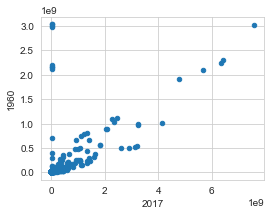

In [47]:
dat.plot.scatter(x = '2017', y = '1960');

<AxesSubplot:xlabel='1960', ylabel='1961'>

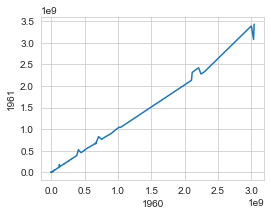

In [37]:
sns.lineplot(data=dat, x="1960", y="1961")

<AxesSubplot:>

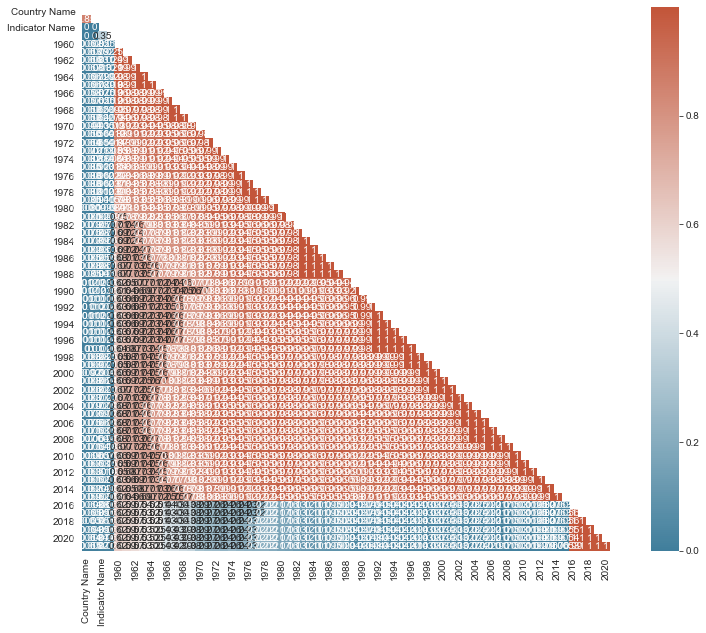

In [46]:
corr = dat.corr().abs()

f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

hmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=hmap)

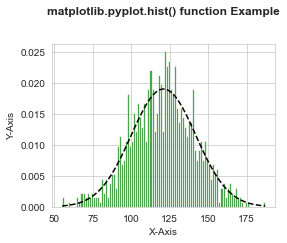

In [50]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
   
np.random.seed(10**7)
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000)
   
num_bins = 100
   
n, bins, patches = plt.hist(x, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '--', color ='black')
  
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
  
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight ="bold")
  
plt.show()

# Data Preprocessing II

## Checking for inoperative data types 

In [23]:
dat.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Length: 66, dtype: object

In [24]:
dat[['Country Name']]=dat[['Country Name']].apply(lambda col:pd.Categorical(col).codes)

In [25]:
dat[['Country Code']]=dat[['Country Code']].apply(lambda col:pd.Categorical(col).codes)

In [26]:
dat[['Indicator Name']]=dat[['Indicator Name']].apply(lambda col:pd.Categorical(col).codes)

In [27]:
dat[['Indicator Code']]=dat[['Indicator Code']].apply(lambda col:pd.Categorical(col).codes)

In [28]:
dat.dtypes

Country Name        int16
Country Code        int16
Indicator Name       int8
Indicator Code       int8
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Length: 66, dtype: object

# Data Analysis II

## Statistical Analysis

In [29]:
dat.describe()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,20216.000000,20216.000000,20216.000000,20216.000000,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,...,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04,2.021600e+04
mean,132.500000,132.500000,37.500000,37.500000,2.533624e+07,1.641633e+07,1.707062e+07,1.820180e+07,1.876413e+07,1.948666e+07,...,7.140837e+08,9.255006e+08,1.046121e+09,1.077976e+09,1.271117e+07,1.558175e+07,1.578658e+07,1.573369e+07,2.501721e+07,4.068436e+07
std,76.788942,76.788942,21.937954,21.937954,6.941069e+07,7.479840e+07,7.935417e+07,8.693946e+07,9.089114e+07,9.615379e+07,...,1.432052e+10,1.689235e+10,1.903337e+10,2.178574e+10,1.283377e+08,1.300636e+08,1.318092e+08,1.335164e+08,1.349448e+08,1.360737e+08
min,0.000000,0.000000,0.000000,0.000000,-3.667000e+00,-3.667000e+00,-3.667000e+00,-3.703670e+02,-3.667000e+00,-2.354033e+00,...,-4.854332e+05,-4.542582e+05,-6.116137e+05,-6.381096e+05,-7.114856e+05,-4.165099e+01,-1.303131e+03,-1.167811e+01,-1.040590e+02,-1.174203e+02
25%,66.000000,66.000000,18.750000,18.750000,2.533624e+07,1.641633e+07,1.707062e+07,1.820180e+07,1.876413e+07,1.948666e+07,...,1.245966e+01,1.820847e+01,1.764380e+01,5.100000e+00,3.019982e+01,6.440633e+01,6.244946e+01,6.220600e+01,2.501721e+07,4.068436e+07
50%,132.500000,132.500000,37.500000,37.500000,2.533624e+07,1.641633e+07,1.707062e+07,1.820180e+07,1.876413e+07,1.948666e+07,...,4.894165e+03,1.027975e+05,7.869976e+04,2.115779e+03,1.271117e+07,1.558175e+07,1.578658e+07,1.573369e+07,2.501721e+07,4.068436e+07
75%,199.000000,199.000000,56.250000,56.250000,2.533624e+07,1.641633e+07,1.707062e+07,1.820180e+07,1.876413e+07,1.948666e+07,...,7.140837e+08,9.255006e+08,1.046121e+09,1.077976e+09,1.271117e+07,1.558175e+07,1.578658e+07,1.573369e+07,2.501721e+07,4.068436e+07
max,265.000000,265.000000,75.000000,75.000000,3.040000e+09,3.428000e+09,3.797000e+09,4.362000e+09,4.653000e+09,4.998000e+09,...,1.067910e+12,1.267130e+12,1.435700e+12,1.644540e+12,7.491934e+09,7.578158e+09,7.661776e+09,7.742682e+09,7.820982e+09,7.888409e+09


In [30]:
dat.corr().abs()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,1.000000,0.852354,0.000000,0.000000,0.006202,0.006343,0.006631,0.006715,0.006610,0.006624,...,0.006266,0.006144,0.006207,0.005889,0.006390,0.006485,0.006528,0.006434,0.006446,0.006501
Country Code,0.852354,1.000000,0.000000,0.000000,0.008545,0.007932,0.008118,0.008093,0.007863,0.007795,...,0.006060,0.006217,0.006370,0.006226,0.008817,0.008934,0.008991,0.008914,0.008725,0.008716
Indicator Name,0.000000,0.000000,1.000000,0.349337,0.025007,0.032190,0.031430,0.029646,0.029426,0.028797,...,0.001396,0.003673,0.003747,0.003559,0.059848,0.054800,0.054820,0.055636,0.044123,0.021350
Indicator Code,0.000000,0.000000,0.349337,1.000000,0.012006,0.025395,0.023713,0.020650,0.019760,0.018201,...,0.019551,0.018858,0.019553,0.017794,0.068782,0.066024,0.066001,0.065342,0.063093,0.028984
1960,0.006202,0.008545,0.025007,0.012006,1.000000,0.995665,0.992380,0.985780,0.981996,0.978565,...,0.649721,0.633958,0.623076,0.612874,0.624751,0.622183,0.621188,0.620162,0.619579,0.619224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.006485,0.008934,0.054800,0.066024,0.622183,0.593331,0.570668,0.533667,0.523027,0.505947,...,0.008183,0.006979,0.006289,0.005573,0.999452,1.000000,0.999925,0.999808,0.998260,0.995509
2018,0.006528,0.008991,0.054820,0.066001,0.621188,0.592423,0.569809,0.532874,0.522261,0.505213,...,0.008175,0.006971,0.006281,0.005565,0.999396,0.999925,1.000000,0.999856,0.998334,0.995597
2019,0.006434,0.008914,0.055636,0.065342,0.620162,0.591466,0.568903,0.532034,0.521449,0.504432,...,0.008125,0.006917,0.006229,0.005518,0.999273,0.999808,0.999856,1.000000,0.998343,0.995632
2020,0.006446,0.008725,0.044123,0.063093,0.619579,0.591342,0.568808,0.532020,0.521458,0.504480,...,0.008061,0.006853,0.006136,0.005440,0.997673,0.998260,0.998334,0.998343,1.000000,0.997250


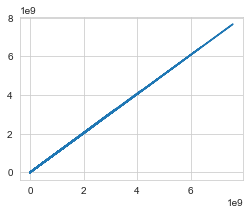

In [35]:
# The "2018" and "2017" variables share highest correlation-coefficient,
# thus the nature of the regression line formed from a regression equation involving these two variable is linear
# Here is the implementation of the above claim
plt.plot(dat['2017'], dat['2018'])